#### Importing the Required Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('mo_final.xlsx')
df.head()

,Electrodes,SC,Cycles
0,1D-RuO2/C,671.00,5000.0
1,3D-MnO2,370.00,5000.0
2,60-MnO2,337.00,1000.0
3,Al2O3,968.00,5000.0
4,Bi2O3,574.64,2250.0


#### Making the Input for clustering and scaling the values

In [4]:
df_new = df.drop(['Electrodes'], axis='columns') # dropping the "Electrodes" column
# df_new

In [5]:
from sklearn.preprocessing import StandardScaler # Scalling the input
sc = StandardScaler()
X = sc.fit_transform(df_new)
# X

#### Using the elbow method to find the optimal number of clusters

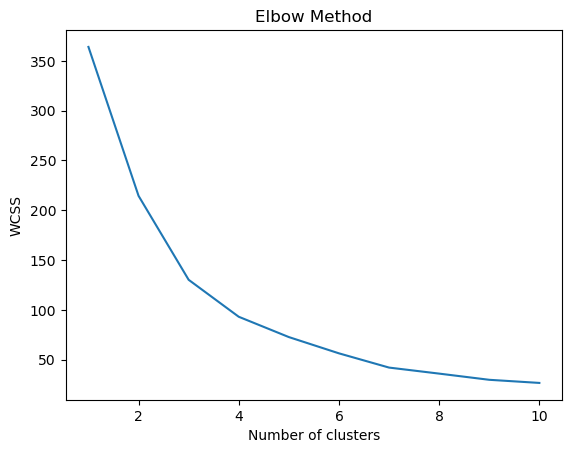

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig("elbow.png", format="png", dpi=1200, pad_inches=0.1,)
plt.show()

#### Deciding the value for K from elbow method and applying K-means clustering

In [47]:
k = 7

In [48]:
kmeans = KMeans(n_clusters = k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
label = kmeans.labels_

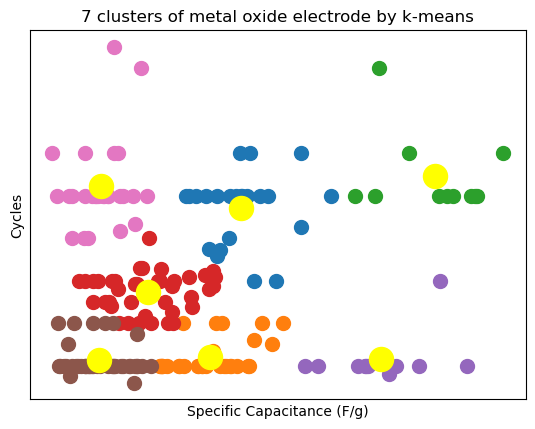

In [49]:
#Ploting the clusters
for cluster_label in range(k):
    cluster_points = X[y_kmeans == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, label=f'Cluster {cluster_label + 1}')

# Plotting the centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 300, c = 'yellow', label = 'Centroids')
plt.title(f'{k} clusters of metal oxide electrode by k-means')
plt.xlabel('Specific Capacitance (F/g)')
plt.ylabel('Cycles')

# Hide ticks and tick labels
plt.xticks([])
plt.yticks([])
plt.tick_params(axis='both', which='both', length=0)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"k_mean_{k}.png", format="png", dpi=1200, pad_inches=0.5)
plt.show()

#### Labeling each cluster points with cluster number

In [50]:
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = label
# df_with_clusters

In [51]:
gk = df_with_clusters.groupby('Cluster') # Grouping the electrode materials based on clusters

In [52]:
gk.get_group(1) # starts from 0 upto k-1

,Electrodes,SC,Cycles,Cluster
17,Co3O4 NWAS,525.500000,1000.000000,1
21,Co3O4-PANI,770.000000,1000.000000,1
28,CoOOH,943.500000,2000.000000,1
29,CoOOH–Co(OH)2,886.000000,1000.000000,1
32,Cr2O3,619.400000,2000.000000,1
33,Cr2O3-C nanoplates,696.730000,1000.000000,1
38,CuO-AC,530.000000,1000.000000,1
39,CuO-Cu2O,780.000000,2000.000000,1
51,FeMoO4 @MnO2,839.290000,1000.000000,1
56,In2O3,622.000000,1000.000000,1


#### Performance Evaluation of Clustering

In [53]:
from sklearn.metrics import silhouette_score

silhouette_score_1 = silhouette_score(X, df_with_clusters['Cluster'])
silhouette_score_1

0.4719276651605707